<a href="https://colab.research.google.com/github/Daria13-gif/Comand_000/blob/main/Poliakova_lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача 1 – Умножение матриц

Напишите функцию для умножения матриц, используя только списки и циклы.

Не забывайте проверить, что умножение выполнить возможно.
Напомним, что две матрицы могут быть перемножены, если число столбцов первой матрицы равно числу строк второй матрицы. Если матрица
$A$ имеет размер $m×n$ ($m$ строк и $nя$ столбцов), а матрица $B$ имеет размер $n×p$, то их произведение $C=AB$ будет иметь размер $m×p$.

Если $A=(a_{ij})$ — матрица размера $m×n$, а $B=(b_{jk})$ — матрица размера $n×p$, то элемент $c_{ik}$ матрицы $C=AB$ вычисляется по формуле:

$$c_{ik}=\sum_{j=1}^{n}a_{ij}b_{jk}$$

То есть каждый элемент новой матрицы является суммой произведений соответствующих элементов строки первой матрицы и столбца второй.

In [ ]:
import numpy as np

matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

print("Произведение матриц:")
matrix1 @ matrix2

Произведение матриц:


array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

In [ ]:
def multiply_matrices(A, B):
    # Получаем размеры матриц
    m = len(A)         # Количество строк в A
    n = len(A[0])      # Количество столбцов в A
    p = len(B[0])      # Количество столбцов в B

    # Проверяем, можно ли перемножить матрицы
    if len(B) != n:
        raise ValueError("Число столбцов первой матрицы должно равняться числу строк второй матрицы.")

    # Создаем результатирующую матрицу C размером m x p
    C = [[0 for _ in range(p)] for _ in range(m)]

    # Умножаем матрицы
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]

    return C

# Пример использования функции
matrix1 = [[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]]

matrix2 = [[9, 8, 7],
            [6, 5, 4],
            [3, 2, 1]]

# Выводим результат
result = multiply_matrices(matrix1, matrix2)
print("Произведение матриц:")
for row in result:
    print(row)


Произведение матриц:
[30, 24, 18]
[84, 69, 54]
[138, 114, 90]


### Задача 2 – Функции

Дано две функции:

\begin{matrix} F(x) = a_{11}x^2 + a_{12}x + a_{13}&(1) \\ P(x) = a_{21}x^2+a_{22}x + a_{23} &(2) \end{matrix}
​
* На вход программа должна принимать 2 строки. Каждая строка содержит 3 действительных числа через пробел: коэффициенты $a$.
* Необходимо найти точки экстремума функций (например, через функцию [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), [`fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) и др.) и определить, есть ли у функций общие решения при введенных коэффициентах на некотором диапазоне значений $x$, предусмотрев ситуации, когда решения есть, решений нет и решений бесконечно много.


In [ ]:
import numpy as np

def find_extrema_and_common_solutions(coeffs_f, coeffs_p):
    # Коэффициенты для F(x)
    a11, a12, a13 = coeffs_f
    # Коэффициенты для P(x)
    a21, a22, a23 = coeffs_p

    # Вычисляем экстремумы (вершины) для F(x) и P(x)
    if a11 != 0:
        x_F = -a12 / (2 * a11)  # Вершина F(x)
    else:
        x_F = None  # Не квадратичная функция

    if a21 != 0:
        x_P = -a22 / (2 * a21)  # Вершина P(x)
    else:
        x_P = None  # Не квадратичная функция

    # Находим общие решения, приравнивая F(x) к P(x)
    a_diff = a11 - a21
    b_diff = a12 - a22
    c_diff = a13 - a23

    # Вычисляем дискриминант
    D = b_diff ** 2 - 4 * a_diff * c_diff

    # Определяем количество решений
    if a_diff == 0:  # Если a11 == a21, то это линейное уравнение или постоянное
        if b_diff == 0:
            if c_diff == 0:
                common_solutions = float('inf')  # Бесконечно много решений
                common_x_values = ()
            else:
                common_solutions = 0  # Нет решений
                common_x_values = ()
        else:
            common_solutions = 1  # Одно решение
            x = -c_diff / b_diff  # Линейное уравнение
            common_x_values = (x,)
    else:
        if D > 0:
            common_solutions = 2  # Два различных решения
            # Находим корни
            x1 = (-b_diff + np.sqrt(D)) / (2 * a_diff)
            x2 = (-b_diff - np.sqrt(D)) / (2 * a_diff)
            common_x_values = (x1, x2)
        elif D == 0:
            common_solutions = 1  # Одно повторяющееся решение
            x = -b_diff / (2 * a_diff)
            common_x_values = (x,)
        else:
            common_solutions = 0  # Нет действительных решений
            common_x_values = ()

    return {
        'extremum_F': x_F,
        'extremum_P': x_P,
        'common_solutions': common_solutions,
        'common_x_values': common_x_values
    }

# Ввод коэффициентов
input_f = input("Введите коэффициенты для F(x) (a11 a12 a13): ")
input_p = input("Введите коэффициенты для P(x) (a21 a22 a23): ")

# Преобразуем введенные строки в списки с вещественными числами
coeffs_f = list(map(float, input_f.split()))
coeffs_p = list(map(float, input_p.split()))

# Запускаем функцию
results = find_extrema_and_common_solutions(coeffs_f, coeffs_p)

# Выводим результаты
print("Экстремум F(x) при x =", results['extremum_F'])
print("Экстремум P(x) при x =", results['extremum_P'])
print("Количество общих решений:", results['common_solutions'])
if results['common_solutions'] > 0:
    print("Общие решения (x):", results['common_x_values'])

Введите коэффициенты для F(x) (a11 a12 a13): 1 0 -1
Введите коэффициенты для P(x) (a21 a22 a23): 1 0 1
Экстремум F(x) при x = -0.0
Экстремум P(x) при x = -0.0
Количество общих решений: 0


### Задача 3 – Коэффициент асимметрии и эксцесса

Напишите функцию, которая для случайной выборки рассчитывает коэффициенты асимметрии и эксцесса.

Коэффициент асимметрии:

$$A_3=\frac{m_3}{\sigma^3}$$

Коэффициент эксцесса:

$$E_4=\frac{m_4}{\sigma^4}-3$$

С помощью этих коэффициентов можно прикинуть, насколько близко распределение выборки к нормальному. Для расчета этих коэффициентов понадобится рассчитать центральные моменты третьего ($m_3$) и четвертого ($m_4$) порядка. Основные формулы, которые понадобятся для расчетов:
1. Момент второго порядка (он же – дисперсия):
$$m_2=D_e=\frac{∑(x_i-\overline{x_e})^2\times n_i}{n}$$
2. Момент третьего порядка:
$$m_3=\frac{∑(x_i-\overline{x_e})^3\times n_i}{n}$$
3. Момент четвертого порядка:
$$m_4=\frac{∑(x_i-\overline{x_e})^4\times n_i}{n}$$

В формулах выше $\overline{x_e}$ – это выборочное среднее.
$$\overline{x_e}=\frac{∑(x_i\times n_i)}{n},$$
где $x_i$ – $i$-е значение из выборки, $n_i$ – число раз, когда $x_i$ встретилось в выборке, $n$ – объем выборки.


Проверить корректность расчетов можно с помощью функции [`kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) для коэффициента эксцесса и функции [`skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) из `scipy`.

**Коэффициент асимметрии** количественно определяет степень асимметрии распределения. Он показывает, в какую сторону распределение скошено относительно своего среднего значения.

1. Если коэффициент асимметрии больше 0, это означает, что "длинная часть" распределения находится справа от среднего (правостороннее распределение). Это может указывать на наличие выбросов или значений, превышающих среднее.
2. Если коэффициент меньше 0, "длинная часть" находится слева от среднего (левостороннее распределение). Это может свидетельствовать о большем количестве низких значений.
3. Коэффициент равен 0, что указывает на симметрию вокруг среднего значения.



**Эксцесс** измеряет остроту распределения по сравнению с нормальным распределением и показывает, насколько вероятны выбросы в данных.

1. Если эксцесс положителен (больше 0), это указывает на более острый пик и более тяжелые хвосты по сравнению с нормальным распределением. Это означает, что в данных больше выбросов.
2. Если эксцесс равен 0, это соответствует нормальному распределению, где пики и хвосты находятся на стандартном уровне.
3. Если эксцесс отрицателен (меньше 0), это говорит о более плоском пике и легких хвостах, что указывает на меньшую вероятность выбросов.

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
kurtosis([2,3,5,7,8]), skew([2,3,5,7,8])

(-1.56508875739645, 0.0)

In [ ]:
kurtosis([2,3,2,5,7,2,2,8]), skew([2,3,2,5,7,2,2,8])

(-1.1002728454980493, 0.7565586244407938)

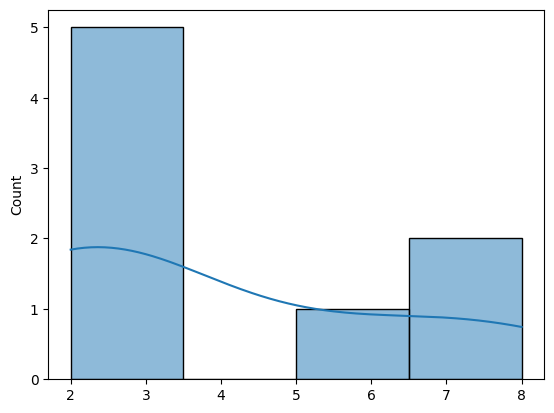

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([2,3,2,5,7,2,2,8], kde=True);

Первый набор данных:
Коэффициент асимметрии: 0.0, Коэффициент эксцесса: -1.56508875739645
Второй набор данных:
Коэффициент асимметрии: 0.7565586244407937, Коэффициент эксцесса: -1.10027284549805
Проверка для первого набора данных: Экцесc: -1.56508875739645, Ассиметрия: 0.0
Проверка для второго набора данных: Экцесc: -1.1002728454980493, Ассиметрия: 0.7565586244407938


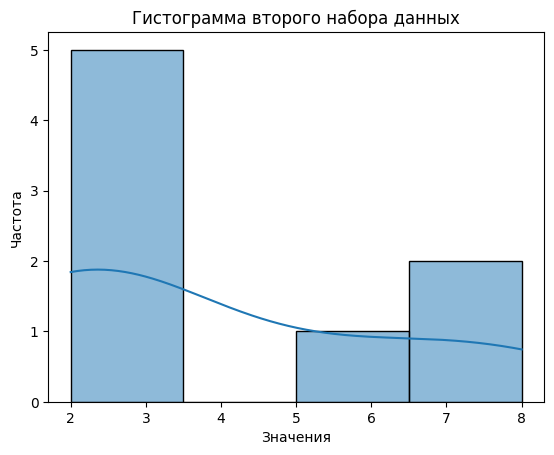

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_moments(data):
    n = len(data)
    mean = np.mean(data)

    # Центральный момент второго порядка (дисперсия)
    m2 = np.sum((data - mean) ** 2) / n

    # Центральный момент третьего порядка
    m3 = np.sum((data - mean) ** 3) / n

    # Центральный момент четвертого порядка
    m4 = np.sum((data - mean) ** 4) / n

    return m2, m3, m4

def calculate_asymmetry_excess(data):
    m2, m3, m4 = calculate_moments(data)

    # Стандартное отклонение
    std_dev = np.sqrt(m2)

    # Коэффициент асимметрии
    A = m3 / (std_dev ** 3) if std_dev != 0 else 0

    # Коэффициент эксцесса
    E = (m4 / (std_dev ** 4)) - 3 if std_dev != 0 else 0

    return A, E

# Использование функции
data1 = [2, 3, 5, 7, 8]
data2 = [2, 3, 2, 5, 7, 2, 2, 8]

A1, E1 = calculate_asymmetry_excess(data1)
A2, E2 = calculate_asymmetry_excess(data2)

print(f"Первый набор данных:\nКоэффициент асимметрии: {A1}, Коэффициент эксцесса: {E1}")
print(f"Второй набор данных:\nКоэффициент асимметрии: {A2}, Коэффициент эксцесса: {E2}")

# Проверка с использованием scipy
print(f"Проверка для первого набора данных: Экцесc: {kurtosis(data1)}, Ассиметрия: {skew(data1)}")
print(f"Проверка для второго набора данных: Экцесc: {kurtosis(data2)}, Ассиметрия: {skew(data2)}")

# Визуализация
sns.histplot(data2, kde=True)
plt.title('Гистограмма второго набора данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


### Куда и как сдавать работу?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**